# 1. Read Data

In [1]:
import numpy as np
import pandas as pd
import re
data_usual = pd.read_excel('D:\\files\\Courses\\Final Year Project\\archive\\usual.xlsx')
data_train = pd.read_excel('D:\\files\\Courses\\Final Year Project\\archive\\train.xlsx')
# data_train.head()
# data_train['emotion'].unique()

C:\Users\Gao\anaconda3\envs\pytorch\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\Gao\anaconda3\envs\pytorch\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


## 1.2 Get plot

In [2]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib import font_manager
# from itertools import accumulate

# #  设置matplotlib绘图时的字体
# my_font = font_manager.FontProperties(fname='D:\\files\\Courses\\Final Year Project\\archive\\ARHei.ttf')

# #  统计句子长度及出现次数的频数
# # df = pd.read_excel('D:\\files\\Courses\\Final Year Project\\archive\\train.xlsx')
# print(data_train.groupby('emotion')['emotion'].count())

# print(type(data_train.text))
# data_train['length'] = data_train.text.astype(str).apply(len)
# # print(df)
# len_df = data_train.groupby('length').count()
# sent_length = len_df.index.tolist()
# sent_freq = len_df['text'].tolist()

# #  绘制句子长度及出现频数统计图
# plt.bar(sent_length, sent_freq)
# plt.title("Plot of sentence length and frequency", fontproperties=my_font)
# plt.xlabel("Sentence length", fontproperties=my_font)
# plt.ylabel("Frequency of sentence length", fontproperties=my_font)
# plt.savefig("./Plot of sentence length and frequency.png")
# plt.close()

# #  绘制句子长度累计分布函数（CDF）
# sent_pentage_list = [(count / sum(sent_freq)) for count in accumulate(sent_freq)]

# # 绘制CDF
# plt.plot(sent_length, sent_pentage_list)

# #  寻找分位点为quantile的句子长度
# quantile = 0.91
# # print(list(sent_pentage_list))
# for length, per in zip(sent_length, sent_pentage_list):
#     if round(per, 2) == quantile:
#         index = length
#         break
# print('\nthe sentence length of %s quantile: %d' % (quantile, index))

# # 绘制句子长度累积分布函数图
# plt.plot(sent_length, sent_pentage_list)
# plt.hlines(quantile, 0, index, colors="c", linestyles="dashed")
# plt.vlines(index, 0, quantile, colors="c", linestyles="dashed")
# plt.text(0, quantile, str(quantile))
# plt.text(index, 0, str(index))
# plt.title("Plot of sentence length cumulative distribution function", fontproperties=my_font)
# plt.xlabel("Sentence length", fontproperties=my_font)
# plt.ylabel("Cumulative distribution of sentence length", fontproperties=my_font)
# plt.savefig("./Plot of sentence length cumulative distribution function.png")
# plt.close()


In [3]:
# data_usual['sentiment'] = data_usual.emotion.apply(emotion2sentiment)
# d = {'cat':data_usual['emotion'].value_counts().index, 'count': data_usual['sentiment'].value_counts()}
# df_cat = pd.DataFrame(data=d).reset_index(drop=True)
# print(type(df_cat))
# df_cat.plot(x='cat', y='count', kind='bar', legend=False, figsize=(8, 5))
# plt.title("Emotion Distribution of whole Data Set")
# plt.ylabel('Count', fontsize=18)
# plt.xlabel('Emotion', fontsize=18)

# plt.savefig("./Plot of usual emotion distribution.png")

In [4]:
# data_train['sentiment'] = data_train.emotion.apply(emotion2sentiment)
# d = {'cat':data_train['emotion'].value_counts().index, 'count': data_train['sentiment'].value_counts()}
# df_cat = pd.DataFrame(data=d).reset_index(drop=True)
# print(type(df_cat))
# df_cat.plot(x='cat', y='count', kind='bar', legend=False, figsize=(8, 5))
# plt.title("Emotion Distribution of Train Data Set")
# plt.ylabel('Count', fontsize=18)
# plt.xlabel('Emotion', fontsize=18)

# plt.savefig("./Plot of train emotion distribution.png")

In [5]:
# data_test['sentiment'] = data_test.emotion.apply(emotion2sentiment)
# d = {'cat':data_test['emotion'].value_counts().index, 'count': data_test['sentiment'].value_counts()}
# df_cat = pd.DataFrame(data=d).reset_index(drop=True)
# print(type(df_cat))
# df_cat.plot(x='cat', y='count', kind='bar', legend=False, figsize=(8, 5))
# plt.title("Emotion Distribution of Test Data Set")
# plt.ylabel('Count', fontsize=18)
# plt.xlabel('Emotion', fontsize=18)

# plt.savefig("./Plot of test emotion distribution.png")

# 2. Preprocess

## 2.1 Label sentiment

In [6]:
def emotion2sentiment(emotion):
    if emotion == 'angry':
        return 0
    elif emotion == 'fear':
        return 1
    elif emotion == 'sad':
        return 2
    elif emotion == 'neural':
        return 3
    elif emotion == 'surprise':
        return 4
    elif emotion == 'happy':
        return 5
    
def sentiment2emotion(sentiment):
    if sentiment == 0:
        return "angry"
    elif sentiment == 1:
        return "fear"
    elif sentiment == 2:
        return "sad"
    elif sentiment == 3:
        return "neural"
    elif sentiment == 4:
        return "surprise"
    elif sentiment == 5:
        return "happy"
    
data_train['sentiment'] = data_train.emotion.apply(emotion2sentiment)
# print(type(data_train.emotion))
# data_train.head()

## 2.2 Remove symbol

In [7]:
# def remove_symbol(s_line):
#     # 剔除英文、数字，以及空格
#     special_regex = re.compile(r"[a-zA-Z0-9\s]+")
#     # 剔除英文标点符号和特殊符号
#     en_regex = re.compile(r"[.…{|}#$%&\'()*+,!-_./:~^;<=>?@★●，。]+")
#     # 剔除中文标点符号
#     zn_regex = re.compile(r"[《》、，“”；～？！：（）【】]+")

#     s_line = special_regex.sub(r"", s_line)
#     s_line = en_regex.sub(r"", s_line)
#     s_line = zn_regex.sub(r"", s_line)
#     return s_line


def remove_symbol(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line


data_train['remove_symbol_text'] = data_train.text.astype(str).apply(remove_symbol)

## 2.3 - 1Cut words by jieba

In [8]:
import jieba

def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))


# data_train.head()

## 2.3 - 2 Cut words by thulac

In [9]:
# import thulac 
# thu1 = thulac.thulac(seg_only=True)  #默认模式
# def chinese_word_cut(mytext):
#     text = thu1.cut(mytext, text=True)  #进行一句话分词
#     return text
# # text = thu1.cut("我爱北京天安门")  #进行一句话分词
# # print(text)

In [10]:
import time
start_time_clock = time.time()
data_train['cut_text'] = data_train['remove_symbol_text'].astype(str).apply(chinese_word_cut)
end_time_clock = time.time()
print("Period: " + (str)(end_time_clock - start_time_clock))
# # data_train.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Gao\AppData\Local\Temp\jieba.cache
Loading model cost 0.438 seconds.
Prefix dict has been built successfully.


Period: 3.2829010486602783


## 2.4 Vectorization

In [11]:
# X = data_train['cut_text']
# y = data_train.sentiment

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=22)
# X_train = data_train['cut_text']
# y_train = data_train.sentiment

In [12]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

def get_custom_stopwords(stop_words_file):
    with open(stop_words_file) as f:
        stopwords = f.read()
    stopwords_list = stopwords.split('\n')
    custom_stopwords_list = [i for i in stopwords_list]
    return custom_stopwords_list

stop_words_file = '哈工大停用词表.txt'
stopwords = get_custom_stopwords(stop_words_file)
# print(type(stopwords))
# vect = CountVectorizer(max_df = 0.8, 
#                        min_df = 3, 
#                        token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b', 
#                        stop_words=stopwords)
vect = TfidfVectorizer(use_idf=True, smooth_idf=True,max_df = 0.8, 
                       min_df = 3, 
                       token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b', 
                       stop_words=stopwords)

In [13]:
# test = pd.DataFrame(vect.fit_transform(X_train).toarray(), columns=vect.get_feature_names_out())
# test.head()
# vect.head()
# print(vect)

# 3 Train

## 3.1 Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
X_train = data_train['cut_text']
y_train = data_train.sentiment
X_train_vect = vect.fit_transform(X_train)
nb.fit(X_train_vect, y_train)
# train_score = nb.score(X_train_vect, y_train)
# print(train_score)

C:\Users\Gao\anaconda3\envs\pytorch\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['exp', 'lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  warnings.warn(


MultinomialNB()

## Long Short-Term Memory

In [15]:
print(type(X_train_vect))
print(X_train_vect.shape)
print(y_train.shape)
print(X_train.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(22214, 12371)
(22214,)
(22214,)


# 4 Test

In [16]:
data_test = pd.read_excel('D:\\files\\Courses\\Final Year Project\\archive\\test.xlsx')
data_test['sentiment'] = data_test.emotion.apply(emotion2sentiment)
data_test['cut_text'] = data_test.text.astype(str).apply(chinese_word_cut)
X_test = data_test['cut_text']
y_test = data_test.sentiment
X_test_vect = vect.transform(X_test)
# print(nb.score(X_test_vect, y_test))
nb_result = nb.predict(X_test_vect)
data_test['nb_result'] = nb_result
# data_test.head(20)

C:\Users\Gao\anaconda3\envs\pytorch\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


# 5 Evaluation

In [17]:
# def get_evaluation_matrix(ls):
#     eval_matrix = np.zeros((6, 6))
#     for m_i in range(len(ls)):
#         m_row = ls['sentiment'][m_i]
#         m_col = ls['nb_result'][m_i]
#         eval_matrix[m_row][m_col] += 1
#     return eval_matrix
# #     print(eval_matrix_nb) 

# def get_evaluation(matrix):
#     tp = []
#     fp = []
#     fn = []
#     tn = []
#     accuracy = []
#     precision = []
#     recall = []
#     f_measure = []
#     for m_i in range(6):
#         m_tp = matrix[m_i][m_i]
#         m_fp = np.sum(matrix, axis=0)[m_i] - matrix[m_i][m_i]
#         m_fn = np.sum(matrix, axis=1)[m_i] - matrix[m_i][m_i]
#         m_tn = np.sum(matrix) - m_tp - m_fp - m_fn
#         m_accuracy = (m_tp + m_tn) / (m_tp + m_fp + m_fn + m_tn)
#         m_precision = (m_tp) / (m_tp + m_fp)
#         m_recall = m_tp / (m_tp + m_fn)
#         m_f_measure = 2 * m_precision * m_recall / (m_precision + m_recall)
#         accuracy.append(m_accuracy)
#         precision.append(m_precision)
#         recall.append(m_recall)
#         f_measure.append(m_f_measure)
#         print(sentiment2emotion(m_i))
#         print("m_tp: " + str(m_tp))
#         print("m_fp: " + str(m_fp))
#         print("m_fn: " + str(m_fn))
#         print("m_tn: " + str(m_tn))
#     overall_accuracy = np.trace(matrix) / np.sum(matrix)
#     overall_precision = np.sum(precision) / len(precision)
#     overall_recall = np.sum(recall) / len(recall)
#     overall_f_measure = 2 * overall_precision * overall_recall / (overall_precision + overall_recall)
#     return overall_accuracy, overall_precision, overall_recall, overall_f_measure, accuracy, precision, recall, f_measure

# eval_matrix_nb = get_evaluation_matrix(data_test)
# overall_accuracy_nb, overall_precision_nb, overall_recall_nb, overall_f_measure_nb, accuracy_nb, precision_nb, recall_nb, f_measure_nb = get_evaluation(eval_matrix_nb)
# print("overall accuracy: " + str(overall_accuracy_nb))
# print("overall precision: " + str(overall_precision_nb))
# print("overall recall: " + str(overall_recall_nb))
# print("overall f_measure: " + str(overall_f_measure_nb))
# for i in range(6):
#     emotion_type = sentiment2emotion(i)
#     print(emotion_type)
#     print(str(accuracy_nb[i]))
#     print(str(precision_nb[i]))
#     print(str(recall_nb[i]))
#     print(str(f_measure_nb[i]))
#     print("accuracy: " + str(accuracy_nb[i]))
#     print("precision: " + str(precision_nb[i]))
#     print("recall: " + str(recall_nb[i]))
#     print("f_measure: " + str(f_measure_nb[i]))


from  sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# print('accuracy %s' % accuracy_score(data_test['nb_result'], data_test['sentiment']))
# print(type(range(6)))
def print_evaluation_report(X, Y):
#     print(type(data_test['sentiment']))
#     print(type(data_test['nb_result']))
#     tg_names = pd.Series(range(len(data_test.emotion.unique()))).apply(sentiment2emotion)
    tg_names = pd.Series(range(len(X.unique()))).apply(sentiment2emotion)
    print(classification_report(X, Y, target_names=tg_names))

print_evaluation_report(data_test['sentiment'], data_test['nb_result'])

              precision    recall  f1-score   support

       angry       0.56      0.89      0.69      1692
        fear       0.86      0.13      0.22       242
         sad       0.51      0.40      0.45       964
      neural       0.83      0.68      0.75      1147
    surprise       0.93      0.06      0.12       440
       happy       0.60      0.62      0.61      1069

    accuracy                           0.61      5554
   macro avg       0.72      0.46      0.47      5554
weighted avg       0.66      0.61      0.58      5554



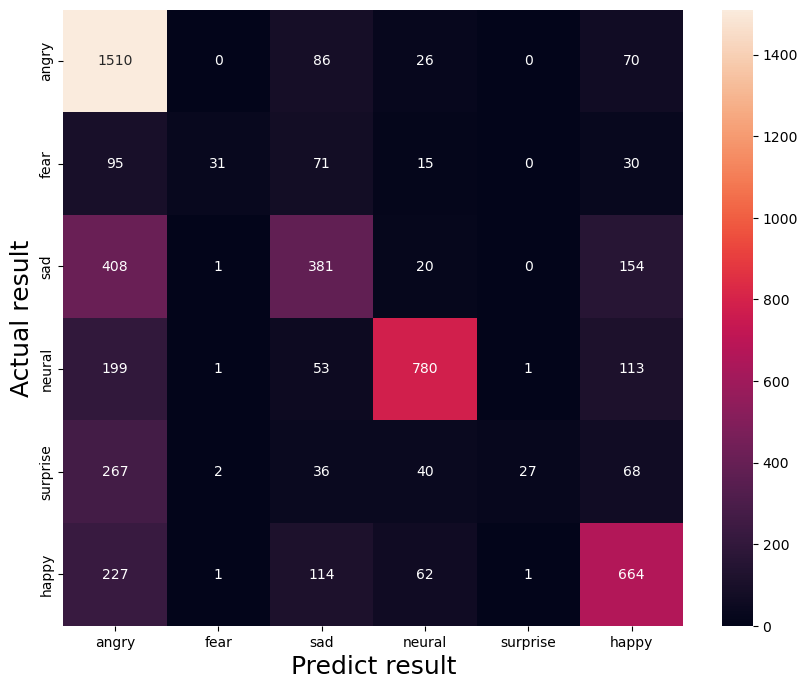

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#生成混淆矩阵
conf_mat = confusion_matrix(y_test, data_test['nb_result'])
fig, ax = plt.subplots(figsize=(10,8))
ticklabels = pd.Series(range(len(data_test.emotion.unique()))).apply(sentiment2emotion)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=ticklabels, yticklabels=ticklabels)
plt.ylabel('Actual result',fontsize=18)
plt.xlabel('Predict result',fontsize=18)
plt.savefig("./Plot of NB result.png")

# Test

In [19]:
# test_input = input("input the sentence:")
# # test_input = "电影真好看"
# test_cut = chinese_word_cut(remove_symbol(test_input))
# # print(type(test_cut))
# test_vec = vect.transform([test_cut])
# # print(type(test_vec))
# res = nb.predict(test_vec)
# # print(res)
# print("The emotion of the sentence is " + sentiment2emotion(res))

# TEMP

In [20]:
from collections import Counter
arr = Counter(y_train)
print(arr)
arr = Counter(y_test)
print(arr)

Counter({0: 6652, 3: 4602, 5: 4310, 2: 4026, 4: 1646, 1: 978})
Counter({0: 1692, 3: 1147, 5: 1069, 2: 964, 4: 440, 1: 242})


In [21]:
# np.sum(eval_matrix_nb)

In [22]:
data_test['emotion'].values

array(['happy', 'angry', 'sad', ..., 'neural', 'happy', 'happy'],
      dtype=object)

In [23]:
# d = {'cat':data_usual['emotion'].value_counts().index, 'count': data_usual['sentiment'].value_counts()}
# df_cat = pd.DataFrame(data=d).reset_index(drop=True)
# df_cat

In [24]:
# df_cat.plot(x='cat', y='count', kind='bar', legend=False,  figsize=(8, 5))
# plt.title("Emotion distribution")
# plt.ylabel('Count', fontsize=18)
# plt.xlabel('Emotion', fontsize=18)